<a href="https://colab.research.google.com/github/lucash3/python_programming/blob/main/M-ary%20Digital%20Mod-Demod%20QAM%20%7C%20FSK%20%7C%20PSK%20%7C%20QAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biblioteca Scikit necessária para gerar a nuvem de sinais no espaço vetorial

In [ ]:
!pip install scikit-dsp-comm

Biliotecas usadas (atenção a última linha)

In [ ]:
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal
import matplotlib.pyplot as plot
import numpy as np
import abc
import sys
from scipy import signal
from numpy import log2,sqrt,sin,pi,exp
from scipy.special import erfc
from scipy.integrate import quad  
import math
from sk_dsp_comm.sigsys import *
from logging import getLogger
log = getLogger(__name__)
from sk_dsp_comm import digitalcom as dc
from logging import getLogger
log = getLogger(__name__)


#descomentar a linha abaixo para usar a função, comentar para o funcionamento das demais
#from matplotlib.pyplot import *
#import matplotlib.pyplot as plt

## Geração de palavras m-árias

In [ ]:
def stream(n_simbols, m_aria, equiprobab):
    if(m_aria==8):
        tamanho = n_simbols*3
        if(equiprobab ==1):
            bitstream = np.random.choice([0, 1], size = (tamanho,), p = [1./2, 1./2])
        else:
            bitstream = np.random.choice([0, 1], size = (tamanho,))
        matriz = np.array_split(bitstream, n_simbols)
    elif(m_aria==16):
        tamanho = n_simbols*4
        if(equiprobab ==1):
            bitstream = np.random.choice([0, 1], size = (tamanho,), p = [1./2, 1./2])
        else:
            bitstream = np.random.choice([0, 1], size = (tamanho,))
        matriz = np.array_split(bitstream, n_simbols)
    elif(m_aria==64):
        tamanho = n_simbols*6
        if(equiprobab ==1):
            bitstream = np.random.choice([0, 1], size = (tamanho,), p = [1./2, 1./2])
        else:
            bitstream = np.random.choice([0, 1], size = (tamanho,))
        matriz = np.array_split(bitstream, n_simbols)
    
    for i in matriz:
      print(i)   

## Geração da forma de onda modulada

In [ ]:
def forma_onda(mod_usada, m):
    
    if mod_usada == 1:
            tipo = 'psk' #Escolher entre 'ask', 'fsk' ou 'psk'
    elif mod_usada == 2:
            tipo = 'ask' #Escolher entre 'ask', 'fsk' ou 'psk'
    elif mod_usada == 3:
            tipo = 'fsk' #Escolher entre 'ask', 'fsk' ou 'psk'
    else:
       print("Este parametro nao existe. Os parametros sao:""\n""1 - PSK",
             "\n""2 - ASK""\n""3 - FSK")
    
    freq = 10
    freqs = 2
    
    if (len(sys.argv) > 1):
            bitsream = str(sys.argv[1])
    
    if (len(sys.argv) > 2):
            type = (sys.argv[2])
    
    if (len(sys.argv) > 3):
            freq = int(sys.argv[3])
    
    
    Fs = 150.0;  # Taxa de amostragem 
    Ts = 1.0/Fs; # Intervalo de amostragem
    
    t = np.arange(0,2,Ts)
    
    if (tipo == 'fsk'):
        if (m == 16):
            bit_arr = np.random.choice([-5,5], size = (10,), p = [1./2, 1./2])
            samples_per_bit = 2*Fs/bit_arr.size 
            dd = np.repeat(bit_arr, samples_per_bit)
            y = np.sin(2 * np.pi * (freq + dd) * t)
        else:
            bit_arr = np.random.choice([-5,5], size = (10,), p = [1./2, 1./2])
            samples_per_bit = 2*Fs/bit_arr.size 
            dd = np.repeat(bit_arr, samples_per_bit)
            y = np.sin(2 * np.pi * (freq + dd) * t)
        
    elif (tipo == 'psk'):
        if (m == 16):
        	bit_arr = np.random.choice([0, 45, 90, 180], size = (10,), p = [1./4, 1./4, 1./4, 1./4])
        	samples_per_bit = 2*Fs/bit_arr.size 
        	dd = np.repeat(bit_arr, samples_per_bit)
        	y= np.sin(2 * np.pi * (freq) * t+(np.pi*dd/180))
        else:
        	bit_arr = np.random.choice([0, 45, 90, 135, 180, 225], size = (10,), p = [1./6, 1./6, 1./6, 1./6, 1./6, 1./6])
        	samples_per_bit = 2*Fs/bit_arr.size 
        	dd = np.repeat(bit_arr, samples_per_bit)
        	y= np.sin(2 * np.pi * (freq) * t+(np.pi*dd/180))     
        
    elif (tipo == 'ask'):
        if (m == 16):
        	bit_arr = np.random.choice([0, 1, 2, 3], size = (10,), p = [1./4, 1./4, 1./4, 1./4])
        	samples_per_bit = 2*Fs/bit_arr.size 
        	dd = np.repeat(bit_arr, samples_per_bit)
        	y= dd*np.sin(2 * np.pi * freq * t)
        else:
        	bit_arr = np.random.choice([0, 0.5, 1, 1.5, 2, 2.5], size = (10,), p = [1./6, 1./6, 1./6, 1./6, 1./6, 1./6])
        	samples_per_bit = 2*Fs/bit_arr.size 
        	dd = np.repeat(bit_arr, samples_per_bit)
        	y= dd*np.sin(2 * np.pi * freq * t)
            
    n = len(y)                    #length do sinal
    k = np.arange(n)
    T = n/Fs
    frq = k/T                     # faixa de frequencia 
    frq = frq[range(n//2)]        
    
    Y = np.fft.fft(y)/n           # Calculo e normalizacao da FFT
    Y = Y[range(n//2)]
    
    # Plot no tempo
    fig,myplot = plot.subplots(2, 1) 
    myplot[0].plot(t,y)
    myplot[0].set_xlabel('Time')
    myplot[0].set_ylabel('Amplitude')
    
    # Plot no espectro
    myplot[1].plot(frq,abs(Y),'r') # plotting the spectrum
    myplot[1].set_xlabel('Freq (Hz)')
    myplot[1].set_ylabel('|Y(freq)|')
    
    
    #plot.savefig(bitsream)
    plot.show()    

## Modulador, Demodulador, Gerador da Constelação e da Taxa de Erro de Símbolo

In [ ]:
class modulacao:
    __metadata__ = abc.ABCMeta
    # classe base: modulacao
    # Atributos:
    #    self.M : numero de pontos na constelacao MPSK 
    #    self.esquema: esquema de modulacao : PSK, QAM, PAM, FSK
    #    self.constelacao : constelacao de referencia
    #    self.coerencia : somente 'coerente' ou 'naocoerente' FSK
    
    def __init__(self, M, constelacao, esquema, coerencia = None):      #constructo
        if (M < 2) or ((M & (M -1)) != 0):                              #laco condicional: M deve ser potencia de 2
            raise ValueError('M deve ser uma potencia de 2')            #mensagem de erro
        if esquema.lower()=='fsk':
            if (coerencia.lower() == 'coerente') or (coerencia.lower() == 'naocoerente'):
                self.coerencia = coerencia
            else:
                raise ValueError('coerencia deve ser \'coerente\' ou \'naocoerente\'')  #mensagem de erro
        else:
            self.coerencia = None
        self.M = M                          # numero de pontos na constelacao 
        self.esquema = esquema              # esquema de modulacao : PSK, QAM, PAM, FSK
        self.constelacao = constelacao      # constelacao de referencia
  
    
#**************************************    
#** Modulo para imprimir a constelacao
#**************************************    
    def plotconstelacao(self):
        """
        Plota a constelacao de referencia para o esquema de modulacao escolhido
        """
        from math import log2
        if self.esquema.lower() == 'fsk':
            return 0                            #FSK e multi-dimensional, portanto dificil de visualizar. O Enunciado tambem nao exige
        
        fig, axs = plot.subplots(1, 1)
        axs.plot(np.real(self.constelacao), np.imag(self.constelacao),'o')      
        
        for i in range(0, self.M):
            axs.annotate("{0:0{1}b}".format(i, int(log2(self.M))), (np.real(self.constelacao[i]),np.imag(self.constelacao[i])))
        
        axs.set_title('constelacao');
        axs.set_xlabel('I');axs.set_ylabel('Q');fig.show()
 
    
#**************************************    
#** Modulo para efetuar a modulacao
#**************************************   
    def modula(self, simbolos_entrada):
        """
            modula um vetor de simbolos de entrada (no formato numpy array) usando o esquema de modulacao escolhido 
            O parametro 'simbolos_entrada' toma valores inteiros na faixa de 0 a M-1 
        """
        
        if isinstance(simbolos_entrada, list):
            simbolos_entrada = np.array(simbolos_entrada)
        
        if  not (0 <= simbolos_entrada.all() <= self.M-1):
            raise ValueError('Valores para simbolos_entrada estao alem da faixa de 0 a M-1')
        
        vetor_modulado = self.constelacao[simbolos_entrada]
        return vetor_modulado                                   #Retorna vetor modulado 

#**************************************    
#** Modulo para efetuar a demodulacao
#**************************************
    
    def demodula(self, simbolos_recebidos):
        """
            Demodula um vetor de simbolos recebidos usando o esquema de modulacao escolhido
        """        
        if isinstance(simbolos_recebidos, list):
            simbolos_recebidos = np.array(simbolos_recebidos)
            
        simbolos_detectados = self.iqDetector(simbolos_recebidos)
        
        return simbolos_detectados
 
#**********************************************************************************#    
#** Modulo para efetuar a detecao otima baseado na distancia euclidiana de pares ***
#**********************************************************************************#
    
    def iqDetector(self, simbolos_recebidos):
        """
        Detector otimo para sinais 2-dim. signals (ex: MQAM,MPSK,MPAM) no plano IQ 
        Notar que: MPAM/BPSK sao esquemas unidimentionais. Esta funcao tambem pode ser aplicada  
        a estas modulacoes, ja que quadratura e igual a zero (Q=0)
        
        A funcao calcula a distancia Euclidiana de pares de cada ponto no vetor recebido
        em relacao a cada ponto na constelacao de referencia. O parametro de retorno sao os simbolos
        da constelacao de referencia que fornecem a menor distancia Euclidiana 
        
        Parametros:
            simbolos_recebidos : vetor de simbolos recebidos na forma complexa 
            
        Retorno:
            simbolos_detectados: smbolos decodificados que expressam a menor distancia Euclidiana 
        """
        
        from scipy.spatial.distance import cdist
        
        # vetor recebido na forma cartesiana 
        XA = np.column_stack((np.real(simbolos_recebidos), np.imag(simbolos_recebidos))) 
        XB = np.column_stack((np.real(self.constelacao), np.imag(self.constelacao)))
        
        d = cdist(XA, XB, metric = 'euclidean')         #calcula distancias Euclidianas em pares
        simbolos_detectados = np.argmin(d,axis=1)       #indexadores correspondentes a distancia minima 
        return simbolos_detectados





            #****************************************************#
            #                                                    #
            #    Construcao de classes Python para cada esquema  #
            #                                                    #
            #****************************************************#


class PAM(modulacao):
    # Classe derivada: PAM
    def __init__(self, M):
        m = np.arange(0, M)                                         # simbolos de informacao m = {0,1,...,M-1}
        constelacao = 2*m+1-M + 1j*0                                # constelacao de referencia 
        modulacao.__init__(self, M, constelacao, esquema = 'PAM')   # atributos da modulacao 

            
        
class PSK(modulacao):
    # Classe derivada: PSK
    def __init__(self, M):        
        #Gera constelacao 
        m = np.arange(0,M)                                      #simbolos de informacao m = {0,1,...,M-1}
        I = 1/np.sqrt(2)*np.cos(m/M*2*np.pi)
        Q = 1/np.sqrt(2)*np.sin(m/M*2*np.pi)
        constelacao = I + 1j*Q                                  #constelacao de referencia       
        modulacao.__init__(self, M, constelacao, esquema='PSK') #atributos da modulacao


        
class QAM(modulacao):
    # Classe derivada: QAM
    def __init__(self, M):
        if (M == 1) or (np.mod(np.log2(M),2) != 0):                                             # M nao e potencia par de 2 
            raise ValueError('Apenas MQAM quadrado suportado. M deve ser potencia par de 2!')   # mensagem de erro
        
        n = np.arange(0,M)                              # enderecos sequencias de 0 a M-1 (dimensao 1 x M)
        a = np.asarray([x^(x>>1) for x in n])           # convertendo enderecos lineares em codigo Gray 
        D = np.sqrt(M).astype(int)                      # Dimensao do Mapa de Karnaugh  (matriz N x N)
        a = np.reshape(a,(D,D))                         # matriz N x N codificada em Gray 
        oddRows=np.arange(start = 1, stop = D ,step=2)  # identificadno linhas alternadas 
        a[oddRows,:] = np.fliplr(a[oddRows,:])          # Roatciona linhas - representacao Mapa de K 
        nGray=np.reshape(a,(M))                         # Volta ao formato (reshape)  1 x M - Gray code walk no mapa de Karnaugh 
 
        
#Construcao de uma constelacao M-QAM ideal a partir de um sqrt(M)-PAM
        
        (x,y) = np.divmod(nGray,D)                        # quociente e resto elemento a elemento 
        Ax = 2*x+1-D                                      # Amplitudes PAM 2d+1-D - eixo real 
        Ay = 2*y+1-D                                      # Amplitudes PAM 2d+1-D - eixo imaginario 
        constelacao = Ax+1j*Ay
        modulacao.__init__(self, M, constelacao, esquema='QAM') #atributos da modulacao 


        
class FSK(modulacao):
    # Classe derivada: FSK
    def __init__(self, M, coerencia = 'coerente'):
        if coerencia.lower() == 'coerente':
            phi = np.zeros(M)                               # fase = 0 para detecao coerente 
            
        elif coerencia.lower() == 'naocoerente':
            phi = 2*np.pi*np.random.rand(M)                 # M fases aleatorias na faixa (0, 2pi)
            
        else:
            raise ValueError('coerencia deve ser \'coerente\' ou \'naocoerente\'')  #mensagem de erro
            
        constelacao = np.diag(np.exp(1j*phi))
        modulacao.__init__(self, M, constelacao, esquema ='FSK', coerencia = coerencia.lower())     #atributos



        
    def demodula(self, simbolos_recebidos, coerencia='coerente'):
        #Sobrepoe o metodo na classe 'modulacao' considerando a 'coerencia'
        if coerencia.lower() == 'coerente':
            return self.iqDetector(simbolos_recebidos)
        
        elif coerencia.lower() == 'naocoerente':
            return np.argmax(np.abs(simbolos_recebidos), axis=1) 
        
        else:
            raise ValueError('coerencia deve ser \'coerente\' ou \'naocoerente\'')
            
            
            
def forma_constelacao(m_simbols,modulation):          
    m=m_simbols
    
    if modulation == 1:
            test_mod= PSK(m)
    elif modulation == 2:
            test_mod= QAM(m) 
    elif modulation == 3:
            test_mod= PAM(m)
    else:
       print("Este parametro nao existe. Os parametros sao:""\n""1 - PSK",
             "\n""2 - QAM""\n""3 - PAM") 
    
    if modulation>0 & modulation<4:
        test_mod.plotconstelacao()

def mod_demod(m,tipo_moduladao,n_simbolos):
    
    if tipo_moduladao == 1:
            test_mod= PSK(m)
    elif tipo_moduladao == 2:
            test_mod= QAM(m) 
    elif tipo_moduladao == 3:
            test_mod= PAM(m)
    elif tipo_moduladao == 4:
            test_mod= FSK(m)    
    else:
       print("Este parametro nao existe. Os parametros sao:""\n""1 - PSK",
             "\n""2 - QAM""\n""3 - PAM") 
    test_mod.plotconstelacao()
    simbolos_entrada=np.random.randint(low=0,high=m,size=n_simbolos)
    simbolos_modulados=test_mod.modula(simbolos_entrada)
    simbolos_detectados=test_mod.demodula(simbolos_modulados)
    return simbolos_entrada,simbolos_modulados,simbolos_detectados

#------------------------------------------------------------------------------------
#----------------------------GERA SER -----------------------------------------------

#**************************************    
#** Modulo para simular canal AWGN
#**************************************

def awgn(s, SNRdB, L = 1):
    """
    Canal AWGN 
    
    Adiciona ruido AWGN ao sinal de entrada. A funcao adiciona ruido ao vetor
    's' para gerar um sinal resultante 'r' com uma determinada SNR em dB. 
    Tambem retorna o vetor ruido 'n' que e adicionado ao sinal 's' e a densidade 
    espectral de potencia N0 do ruido
    
    Parametros:
        s : vetor sinal de entrada/transmitido 
        SNRdB : relacao sinal ruido (SNR) desejada (expressa em dB)            
        L : fator de sobreamostragem (aplicavel as formas de onda de simulacao)
            por padrao deixei igual a 1 (L = 1).
            
    Retorna:
        r : vetor sinal recebido (r = s + n)
    """
    gamma = 10**(SNRdB/10)                      #SNR para escala linear 
    
    if s.ndim == 1:                             # se for um vetor unidimensional 
        P = L*sum(abs(s)**2)/len(s)             # potencia real
        
    else:                                       # se for um sinal multi-dimensional  (ex: MFSK)
        P=L*sum(sum(abs(s)**2))/len(s)          # matriz [MxN]

#Calculo da densidade espectral de potencia        
    N0 = P/gamma 
    
    if isrealobj(s):                               # verifica se a entrada e um objeto python real/complexo 
        n = sqrt(N0/2)*standard_normal(s.shape)    # ruido calculado 
        
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
        
    r = s + n                                     # sinal recebido (sinal + ruido)   
    
    return r       


#################################################################################
#####
##### TAXA DE ERROS DE SIMBOLOS (SER) para varias modulacoes em canal AWGN
#####                           (SYMBOL ERROR RATE)
#################################################################################

def ser_awgn(EbN0dBs, esquema_modulacao = None, M = 0, coerencia = None):
    
    """
    Taxa de erro de simbolo (SER) Teorica para varias modulacoes em canal AWGN
    
    Parametros:
        
        EbN0dBs : lista de VALORES SNR por bit  em escala dB 
        
        esquema_modulacao : 'PSK','QAM','PAM','FSK'
        
        M : niveis de Modulacao para o esquema escolhido.
            Observacao: para o PSK,PAM e FSK o  'M' pode ser qualquer potencia de 2.
            Observacao2: para o QAM o 'M' deve ser uma potencia par de 2 (denominado QAM quadrado)
            
        coerencia : 'coerente' para detecao FSK coerente
                    'naocoerente' para detecao FSK nao coerente
                    
                Obs: parametro aplicavel somente a modulacao FSK 
    Retorna:
        SERs = lista de taxas de erros de simbolo 
    """
    
    if esquema_modulacao == None:
        raise ValueError('Escolha invalida para o parametro esquema_modulacao')
        
    if (M < 2) or ((M & (M -1))!=0):                     #Se M nao e potencia de 2
        raise ValueError('M deve ser uma potencia de 2') #mensagem de erro

#********************************************    
#Construcao de um dicionario com os esquemas 
#********************************************    
    func_dict = {'psk': psk_awgn, 'qam':qam_awgn, 'pam':pam_awgn,'fsk':fsk_awgn}   
    
    gamma_s = log2(M)*(10**(EbN0dBs/10))
    
    if esquema_modulacao.lower() == 'fsk':                                   #invoca funcao apropriada 
        return func_dict[esquema_modulacao.lower()](M,gamma_s,coerencia) 
    
    else:
        return func_dict[esquema_modulacao.lower()](M,gamma_s)               #invoca funcao apropriada
    
#-----------------------------------------------------------------   

def psk_awgn(M, gamma_s):
    """
    Taxa de erro de simbolo Teorica para esquema PSK em canal AWGN
    
    Parametros:
        M : Nivel de modulacao para o esquema escolhido 
            Para o PSK, M pode ser qualquer potencia de 2.
        gamma_s : lista da relacao snr por simbolo
        
    Retorna:
        SERs = lista das taxas de erros de simbolos 
    """
    
    gamma_b = gamma_s/log2(M)
    
    if (M == 2):
        SERs = 0.5*erfc(sqrt(gamma_b))
        
    elif M == 4:
        Q = 0.5*erfc(sqrt(gamma_b))
        SERs = 2*Q-Q**2
        
    else:
        SERs = erfc(sqrt(gamma_s)*sin(pi/M))
    return SERs

#----------------------------------------------------------------- 

def qam_awgn(M,gamma_s):
    """
    Taxa de erro de simbolo Teorica para esquema QAM quadrado em canal AWGN
    
    Parametros:
        M : Nivel de Modulacao do esquema
            Para o QAM, M deve ser potencia de 2 par (QAM quadrado).
        gamma_s : lista da relacao snr por simbolo
        
    Retorna:
        SERs = lista das taxas de erros de simbolos 
    """
    
    if (M == 1) or (np.mod(np.log2(M),2)!=0):                                       # M  nao e potencia par de 2
        raise ValueError('Somente MQAM quadrado supportado. M deve ser um potencia par de 2')   #mensagem de erro
        
    SERs = 1-(1-(1-1/sqrt(M))*erfc(sqrt(3/2*gamma_s/(M-1))))**2
    
    return SERs
#----------------------------------------------------------------- 

def pam_awgn(M,gamma_s):
    """
    Taxa de erro de simbolo Teorica para esquema PAM  em canal AWGN
    
    Parametros:
        M : nivel de Modulacao
            para o PAM, M pode ser qualquer potencia de 2.
        gamma_s : lista da relacao snr por simbolo
        
    Retorna:
        SERs = lista das taxas de erros de simbolos
    """
    
    SERs = 2*(1-1/M)*0.5*erfc(sqrt(3*gamma_s/(M**2-1)))
    
    return SERs
#----------------------------------------------------------------- 

def integrando(q, gamma_s, M):
    """
    Calculo do integrando usado para calcular a taxa de erro de simbolo (SER) para o FSK coerente        
    
    Parametros:
    q : variavel q na conta teorica 
    gamma_s : lista da relacao snr por simbolo
    M : nivel de Modulacao 
        para o FSK, M pode ser qualquer potencia de 2.
        
    Retorna:
        a equacao do integrando calculada como uma funcao 
    """
    
    return (0.5*erfc((-q-np.sqrt(2*gamma_s))/np.sqrt(2)))**(M-1)\
        *1/np.sqrt(2*pi)*np.exp(-(q**2)/2)
        
        
#----------------------------------------------------------------- 

def fsk_awgn(M_val, gamma_s_vals, coerencia):
    """
    Taxa de erro de simbolo teorica para o esquema FSK em canal AWGN
    
    Parametros:
        M_val: nivel de Modulacao para o FSK 
            Para o FSK, M pode ser qualquer potencia de 2
            
        gamma_s_vals: lista da relacao snr por simbolo
        
        coerencia: 'coerente' para deteccao FSK coerente
                    'naocoerente' para detecao FSK nao coerente
    Retorna:
        SERs = lista das taxas de erros de simbolos
    """
    
    SERs = np.zeros(len(gamma_s_vals))
    
    if coerencia.lower() == 'coerente':
        for j,gamma_s in enumerate(gamma_s_vals):
            (y,_) =  quad(integrando,-np.inf,np.inf,(gamma_s,M_val))
            SERs[j] = 1- y
            
    elif coerencia.lower() == 'naocoerente':
        
#Adendo importante: uso da SymPy - 'symbolic mathematics Python' para calcular SER 
        from sympy import symbols, Symbol, Sum, exp, binomial, erfc, integrate, oo, sqrt
        
        M,i = symbols('M i', integer = True, positive = True)
        
        gamma = Symbol('gamma')
        
        s = Sum((-1)**(i+1)/(i+1)*binomial(M-1,i)*exp(-i/(i+1)*gamma),(i,1,M-1))
        
        for j,gamma_s in enumerate(gamma_s_vals):
            
            SERs[j] = s.evalf(subs={M:M_val,gamma:gamma_s}) #expressao avaliada para valores de M e gamma_s
            
    else:
        raise ValueError('Para o FSK o paramentro coerencia deve ser \'coerente\' ou \'naocoerente\'')
        
    return SERs 

    
        ###############################################################
        ####                                                      #####
        ####    Rotina de avaliacao de performance dos esquemas   #####
        ####                                                      #####
        ###############################################################
        


#---------Parametros de entrada ------------------------

def SER(modulation):
    
    if modulation == 1:
            esquema_mod= 'PSK'
            array_M = [2, 4, 8, 16, 32]
    elif modulation == 2:
            esquema_mod= 'QAM'
            array_M = [4, 16, 64, 256]
    elif modulation == 3:
            esquema_mod= 'PAM'
            array_M = [2, 4, 8, 16, 32]
    elif modulation == 4:
            esquema_mod= 'FSK'
            array_M = [2, 4, 8, 16, 32]
    else:
       print("Este parametro nao existe. Os parametros sao:""\n""1 - PSK",
             "\n""2 - QAM""\n""3 - PAM")
       
    numero_simbolos = 10**6                             # Numero de simbolos a serem transmitidos 
    EbN0dBs = np.arange(start=-4,stop = 12, step = 2)   # faixa da razao Eb/N0 em dB para fins de simulacao
    esquema_modulacao = esquema_mod                           # Escolher entre 'PSK','QAM', 'PAM' ou 'FSK'
        
    coerencia = 'coerente'            #'coerente'/'naocoerente'- somente para FSK
    
    dicionario_de_modulacoes = {'psk': PSK, 'qam':QAM, 'pam':PAM, 'fsk': FSK}   #Dicionario completo (ver inicio do programa)
    
    
    cores = plot.cm.jet(np.linspace(0,1,len(array_M)))              #mapeamento da paleta de cores
    fig, ax = plot.subplots(nrows = 1, ncols = 1)
    
    for i, M in enumerate(array_M):
        
        
    #----- Inicializacao dos paramentros ----
    
        k = np.log2(M)
        
        EsN0dBs = 10*np.log10(k) + EbN0dBs                          # calculo da EsN0dB 
        SER_sim = np.zeros(len(EbN0dBs))                            # Taxas de erros de simbolo simuladas 
        
        simbolos_entrada = np.random.randint(low = 0, high = M, size = numero_simbolos)
        
        # simbolos aleatorios uniformes de 0 a M-1   
        if esquema_modulacao.lower() == 'fsk':
            modem = dicionario_de_modulacoes[esquema_modulacao.lower()](M, coerencia)   # escolhe uma modulacao/demodulacao do dicionario 
            
        else:        #para os demais casos de modulacao 
            modem = dicionario_de_modulacoes[esquema_modulacao.lower()](M)      # escolha uma modulacao/demodulacao do dicionario
            
        simbolos_modulados = modem.modula(simbolos_entrada)  #invoca def 'modula' (ver inicio do programa)
        
        for j, EsN0dB in enumerate(EsN0dBs):
            simbolos_recebidos = awgn(simbolos_modulados, EsN0dB)       #adiciona ruido awg
            
            if esquema_modulacao.lower() == 'fsk':                      #demodula (ver inicio do programa)         
                simbolos_detectados = modem.demodula(simbolos_recebidos,coerencia)
                
            else: #demodula
                simbolos_detectados = modem.demodula(simbolos_recebidos)
                
            SER_sim[j] = np.sum(simbolos_detectados != simbolos_entrada)/numero_simbolos
        
        SER_teorico = ser_awgn(EbN0dBs, esquema_modulacao, M, coerencia)      #Taxa de erro de simbolo teorico
    
    #********** Legenda ***********    
        ax.semilogy(EbN0dBs, SER_sim, color = cores[i], marker = 'o',linestyle = '', label = 'Sim '+str(M)+'-'+esquema_modulacao.upper())
        
        ax.semilogy(EbN0dBs,SER_teorico,color = cores[i],linestyle='-',label='Teorico '+str(M)+'-'+esquema_modulacao.upper())

#*******************************
    ax.set_xlabel('Eb/N0(dB)');ax.set_ylabel('SER ($P_s$)')
    ax.set_title('Probabilidade de Erro de Simbolo para o M-'+str(esquema_modulacao)+' em um canal AWGN')
    ax.legend();fig.show()


## Geração da representação no espaço vetorial com ruído AWGN

In [ ]:
def vetorial_ruido(mod_type, m, EbN0):
    
    if(mod_type==1):
        #******  QAM  ******#
        M = m
        numero_de_simbolos = 100000
        Ns = 1                                    # com  Ns = 1 nao e necessario um filtro casado 
        EbN0_dB = EbN0
        EsN0_dB = 10*math.log10(math.log2(M))+ EbN0_dB
        
        print('Eb/N0 = %4.2f dB and Es/N0 = %4.2f dB' % (EbN0_dB,EsN0_dB))
        
        xbb,b,data = dc.QAM_gray_encode_bb(numero_de_simbolos,Ns,M,'src')
        
        # Injecao no canal de comunicação adicionando ruido
        rbb = dc.cpx_AWGN(xbb, EsN0_dB,Ns)
        
        
        # Plotando a constelacao como scatter plot
        numero_de_pontos = 2000
        scat_data = rbb
        plot(scat_data[:numero_de_pontos].real,scat_data[:numero_de_pontos].imag,'r.')
        axis('equal')
        title(' Grafico de dispersao IQ')
        ylabel(r'Quadratura')
        xlabel(r'em Fase')
        grid();
        
        # Decodifica os simbolos QAM  de volta para uma bistream 
        data_hat = dc.QAM_gray_decode(rbb,M)
        Nbits,Nerrors = dc.BPSK_BEP(data,data_hat)
        print('BEP: Nbits = %d, Nerror = %d, Pe_est = %1.3e' % \
         (Nbits, Nerrors, Nerrors/Nbits))

 
    if(mod_type==2):
        #******* QPSK ********#
        
        num_symbols = 1000
        
        x_int = np.random.randint(0, 4, num_symbols)            # 0 ate 3
        x_degrees = x_int*360/4.0 + 45                          # 45, 135, 225, 315 graus
        x_radians = x_degrees*np.pi/180.0                       # sen() , cos() em radianos
        x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians)    # produz os simbolos commplexos QPSK 
     
        
        n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2)     # contaminacao ruido
        noise_power = 0.01
        r = x_symbols + n * np.sqrt(noise_power)
        plot(np.real(r), np.imag(r), '.')
        plot.grid(True)
        plot.show()

## Rotina de Testes

In [ ]:
stream(20, 8, 1)               #nº de palavras, tipo m-ario (8, 16, 64), equiprobabilidade (1:sim, 0:não)

[0 0 0]
[1 1 0]
[1 1 1]
[1 1 0]
[0 0 1]
[1 1 1]
[0 1 1]
[0 1 1]
[0 1 1]
[0 1 0]
[1 0 0]
[0 1 0]
[0 0 1]
[1 1 1]
[0 1 1]
[1 0 1]
[1 1 1]
[1 0 0]
[0 0 1]
[0 0 1]


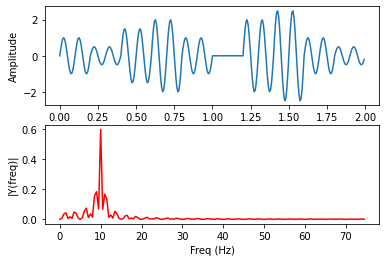

In [ ]:
forma_onda(2, 64)               #tipo de modulação (1: PSK, 2:ASK, 3:FSK), m-ario (16, 64)

In [ ]:
mod_demod(16, 2, 20)            #m-ario (2,4,8,16,64), tipo de modulação (1: PSK, 2:QAM, 3:PAM, 4:FSK), nº de palavras

Lembrar de habilitar a biblioteca scikit antes de executar a função *vetorial_ruido*

In [ ]:
vetorial_ruido(1, 4, 15)       #tipo modulação (1: QAM, 2:PSK; m-ario; EbN0)

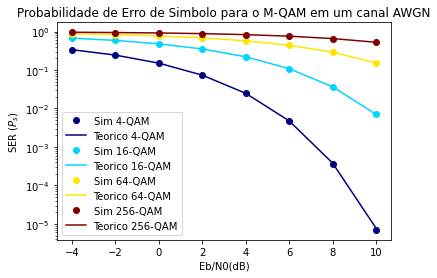

In [ ]:
SER(2)                          #(1: PSK, 2: QAM, 3: PAM e  4:FSK)